In [51]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [52]:
import numpy as np
import pandas as pd
import scipy.stats as st

In [53]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [54]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [55]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [56]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [57]:
# We can view all of the classes that automap found
Base.metadata.tables

immutabledict({'measurement': Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None), 'station': Table('station', MetaData(bind=None), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)})

In [58]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [59]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [60]:
import datetime as dt

In [103]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# make date object. must be in (year, month, day) order 
finalDate = dt.date(2017, 8, 23)
yearPrevious = finalDate - dt.timedelta(days=365)

prcp = session.query(Measurement.date, Measurement.prcp, Measurement.station, Measurement.tobs).filter(Measurement.date >= yearPrevious).all()
print(prcp)

[('2016-08-23', 0.0, 'USC00519397', 81.0), ('2016-08-24', 0.08, 'USC00519397', 79.0), ('2016-08-25', 0.08, 'USC00519397', 80.0), ('2016-08-26', 0.0, 'USC00519397', 79.0), ('2016-08-27', 0.0, 'USC00519397', 77.0), ('2016-08-28', 0.01, 'USC00519397', 78.0), ('2016-08-29', 0.0, 'USC00519397', 78.0), ('2016-08-30', 0.0, 'USC00519397', 79.0), ('2016-08-31', 0.13, 'USC00519397', 80.0), ('2016-09-01', 0.0, 'USC00519397', 81.0), ('2016-09-02', 0.0, 'USC00519397', 80.0), ('2016-09-03', 0.0, 'USC00519397', 79.0), ('2016-09-04', 0.03, 'USC00519397', 75.0), ('2016-09-05', None, 'USC00519397', 79.0), ('2016-09-06', None, 'USC00519397', 76.0), ('2016-09-07', 0.05, 'USC00519397', 76.0), ('2016-09-08', 0.0, 'USC00519397', 80.0), ('2016-09-09', 0.03, 'USC00519397', 79.0), ('2016-09-10', 0.0, 'USC00519397', 78.0), ('2016-09-11', 0.05, 'USC00519397', 76.0), ('2016-09-12', 0.0, 'USC00519397', 78.0), ('2016-09-13', 0.02, 'USC00519397', 78.0), ('2016-09-14', 1.32, 'USC00519397', 75.0), ('2016-09-15', 0.42, 

In [105]:
# Save the query results as a Pandas DataFrame and set the index to the date column
yearRain = pd.DataFrame(prcp, columns=['date', 'prcp', 'station', 'temp'])
# Sort the dataframe by date
yearRain.set_index(yearRain['date'], inplace = True)
yearRain

date  prcp      station  temp
date                                           
2016-08-23  2016-08-23  0.00  USC00519397  81.0
2016-08-24  2016-08-24  0.08  USC00519397  79.0
2016-08-25  2016-08-25  0.08  USC00519397  80.0
2016-08-26  2016-08-26  0.00  USC00519397  79.0
2016-08-27  2016-08-27  0.00  USC00519397  77.0
...                ...   ...          ...   ...
2017-08-19  2017-08-19  0.09  USC00516128  71.0
2017-08-20  2017-08-20   NaN  USC00516128  78.0
2017-08-21  2017-08-21  0.56  USC00516128  76.0
2017-08-22  2017-08-22  0.50  USC00516128  76.0
2017-08-23  2017-08-23  0.45  USC00516128  76.0

[2230 rows x 4 columns]

In [106]:
#converting date column to datetime
yearRain['date']=pd.to_datetime(yearRain['date'])

In [107]:
#extracting month from 'date' column and putting in a new column
yearRain['month'] = yearRain['date'].dt.month

In [108]:
yearRain

date  prcp      station  temp  month
date                                                 
2016-08-23 2016-08-23  0.00  USC00519397  81.0      8
2016-08-24 2016-08-24  0.08  USC00519397  79.0      8
2016-08-25 2016-08-25  0.08  USC00519397  80.0      8
2016-08-26 2016-08-26  0.00  USC00519397  79.0      8
2016-08-27 2016-08-27  0.00  USC00519397  77.0      8
...               ...   ...          ...   ...    ...
2017-08-19 2017-08-19  0.09  USC00516128  71.0      8
2017-08-20 2017-08-20   NaN  USC00516128  78.0      8
2017-08-21 2017-08-21  0.56  USC00516128  76.0      8
2017-08-22 2017-08-22  0.50  USC00516128  76.0      8
2017-08-23 2017-08-23  0.45  USC00516128  76.0      8

[2230 rows x 5 columns]

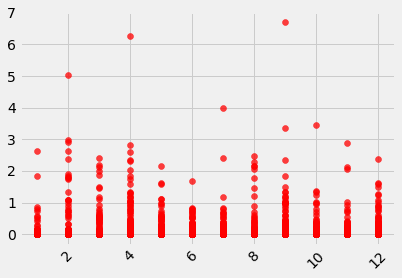

In [129]:
#plotted by month
x_axis = yearRain['month']
y_axis = yearRain['prcp']
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", alpha=0.75)
plt.xticks(rotation=45)
plt.show()

In [110]:
yearRain.loc[yearRain['station'] == 'USC00511918']

Empty DataFrame
Columns: [date, prcp, station, temp, month]
Index: []

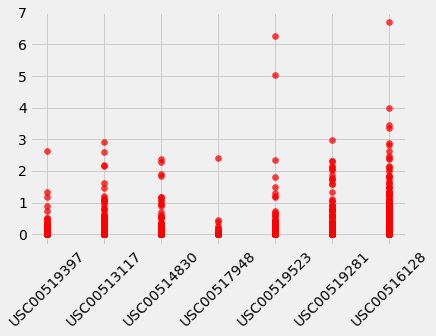

In [111]:
# plotted by station
x_axis = yearRain['station']
y_axis = yearRain['prcp']
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", alpha=0.75)
plt.xticks(rotation=45)
plt.show()

In [130]:
#we notice that only 7 of 9 stations are plot so we check to see if this is an error or if the stations just have no data to plot
yearRain.loc[yearRain['station'] == 'USC00511918']

Empty DataFrame
Columns: [date, prcp, station, temp, month]
Index: []

In [112]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# mean, median, variance, standard deviation, and SEM
mean = (yearRain['prcp']).mean()
median = (yearRain['prcp']).median()
sd = (st.tstd(yearRain['prcp']))
var = (yearRain.var()['prcp'])
sem = (yearRain.sem()['prcp'])
prcp_sumstats = { 'Mean' : mean,
                'Median' : median,
                'Stan. Dev' : sd,
                'Variance' : var,
                'SEM' : sem}
prcp_sumstats

{'Mean': 0.17727857496288996,
 'Median': 0.02,
 'Stan. Dev': nan,
 'Variance': 0.21269575849618544,
 'SEM': 0.010258792791451843}

In [113]:
# Design a query to show how many stations are available in this dataset?
st_count = session.query(Measurement).group_by(Measurement.station).count()
st_count

9

In [114]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
count = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [120]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
maxtemp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(maxtemp)
mintemp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(mintemp)
avgtemp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(avgtemp)

[(85.0,)]
[(54.0,)]
[(71.66378066378067,)]


In [122]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_stats = session.query(Measurement.date, Measurement.prcp, Measurement.station, Measurement.tobs).filter(Measurement.date >= yearPrevious).filter(Measurement.station == 'USC00519281').all()
station_stats

[('2016-08-23', 1.79, 'USC00519281', 77.0),
 ('2016-08-24', 2.15, 'USC00519281', 77.0),
 ('2016-08-25', 0.06, 'USC00519281', 80.0),
 ('2016-08-26', 0.01, 'USC00519281', 80.0),
 ('2016-08-27', 0.12, 'USC00519281', 75.0),
 ('2016-08-28', 0.6, 'USC00519281', 73.0),
 ('2016-08-29', 0.35, 'USC00519281', 78.0),
 ('2016-08-30', 0.0, 'USC00519281', 77.0),
 ('2016-08-31', 0.24, 'USC00519281', 78.0),
 ('2016-09-01', 0.02, 'USC00519281', 80.0),
 ('2016-09-02', 0.01, 'USC00519281', 80.0),
 ('2016-09-03', 0.12, 'USC00519281', 78.0),
 ('2016-09-04', 0.14, 'USC00519281', 78.0),
 ('2016-09-05', 0.03, 'USC00519281', 78.0),
 ('2016-09-06', 0.11, 'USC00519281', 73.0),
 ('2016-09-07', 0.16, 'USC00519281', 74.0),
 ('2016-09-08', 0.07, 'USC00519281', 80.0),
 ('2016-09-09', 0.16, 'USC00519281', 79.0),
 ('2016-09-10', 0.09, 'USC00519281', 77.0),
 ('2016-09-11', 0.3, 'USC00519281', 80.0),
 ('2016-09-12', 0.31, 'USC00519281', 76.0),
 ('2016-09-13', 0.34, 'USC00519281', 79.0),
 ('2016-09-14', 2.33, 'USC00519281'

In [123]:
yearStation = pd.DataFrame(station_stats, columns=['date', 'prcp', 'station', 'temp'])
yearStation

date  prcp      station  temp
0    2016-08-23  1.79  USC00519281  77.0
1    2016-08-24  2.15  USC00519281  77.0
2    2016-08-25  0.06  USC00519281  80.0
3    2016-08-26  0.01  USC00519281  80.0
4    2016-08-27  0.12  USC00519281  75.0
..          ...   ...          ...   ...
347  2017-08-14  0.00  USC00519281  77.0
348  2017-08-15  0.32  USC00519281  77.0
349  2017-08-16  0.12  USC00519281  76.0
350  2017-08-17  0.01  USC00519281  76.0
351  2017-08-18  0.06  USC00519281  79.0

[352 rows x 4 columns]

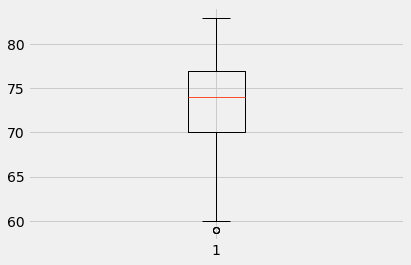

In [125]:
temp = yearStation['temp']
fig1, ax1 = plt.subplots()
ax1.set_title = ('12 Months of Temp Data')
ax1.set_ylabel = ('Temp(F)')
ax1.boxplot(temp)
plt.show()

## Bonus Challenge Assignment

In [131]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [132]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2016-05-26', '2016-06-10'))

[(64.0, 73.5360824742268, 81.0)]


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
